# Scikit-learn for Regression

[Resource](https://harvard-iacs.github.io/2018-CS109A/labs/lab-3/solutions/)



In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)
import seaborn as sns

# Simple Linear Regression

I'm pretty certain I already did this at an earlier point, but oh well. I need to redo it to follow along for the project. UGH!

We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations. Each observation consists of one predictor xi and one response yi for i = 1, 2, 3.

Blah blah blah insert some stuff about reshaping (where the hell did my original follow along for this go?).

Now here's some basic plotting examples:

(3,) (3,)


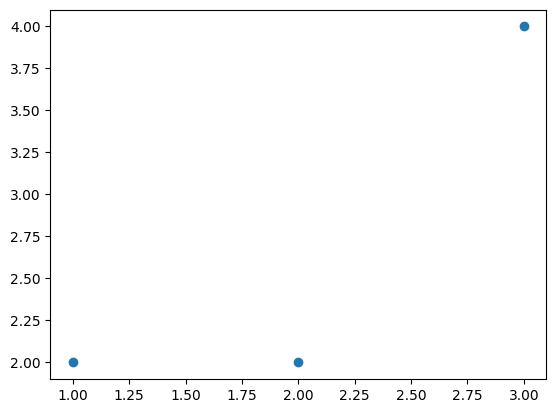

In [2]:
# make a simple scatterplot
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

And here's a "nice" scatterplot:

<Axes: title={'center': 'hello nice plot'}, xlabel='$x$', ylabel='$y$'>

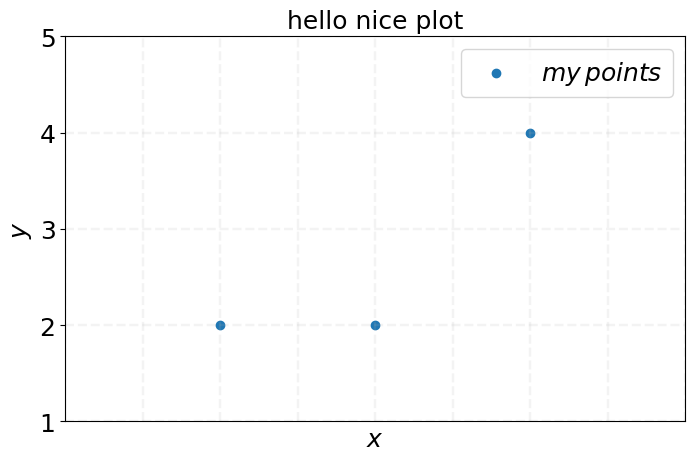

In [3]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$my points$')
    #ax.scatter(x, y, label='$my points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'hello nice plot')

Then they go over a bunch of stuff you already know about the linear regression formula then build a model from scratch (waste of time. We're not doing that again).

# Building a model with statsmodels and sklearn

For the purposes of this lab, statsmodels and sklearn do the same thing. More generally though, statsmodels tends to be easier for inference [finding the values of the slope and intercept and dicussing uncertainty in those values], whereas sklearn has machine-learning algorithms and is better for prediction [guessing y values for a given x value]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

In [5]:
import statsmodels.api as sm

In [12]:
x_train = np.array([[1, 2, 3]]).T
X = sm.add_constant(x_train)
print(X)

toyregr_sm = sm.OLS(y_train, X)
results_sm = toyregr_sm.fit()

beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f"Slope: {beta1_sm:.2f}\nIntercept: {beta0_sm:.2f}")

[[1. 1.]
 [1. 2.]
 [1. 3.]]
Slope: 1.00
Intercept: 0.67


And here's the summary that you're oh so familiar with:

In [14]:
import warnings
warnings.filterwarnings("ignore")

print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Mon, 01 Dec 2025   Prob (F-statistic):              0.333
Time:                        13:24:06   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

Now here's the `sklearn` way:

In [17]:
from sklearn import linear_model

toyregr = linear_model.LinearRegression()

results = toyregr.fit(x_train, y_train)

beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print(f"Slope: {beta1_skl:.2f}\nIntercept: {beta0_skl:.2f}")

Slope: 1.00
Intercept: 0.67


## The shape of things in scikit-learn

Before diving right in to a "real" problem, we really ought to discuss more of the details of sklearn. We do this now. Along the way, we'll import the real-world dataset.

In scikit-learn, an estimator is a Python object that implements the methods fit(X, y) and predict(T)

We will consider two estimators in this lab: LinearRegression and KNeighborsRegressor.

Critically, `Xtrain` must be in the form of an array of arrays (or a 2x2 array) with the inner arrays each corresponding to one sample, and whose elements correspond to the feature values for that sample (visuals coming in a moment).

`ytrain` on the other hand is a simple array of responses. These are continuous for regression problems.

## Practice with sklearn

In [19]:
import pandas as pd

#load mtcars
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Next, let's split the dataset into a training set and test set.

In [20]:
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [21]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


Now we have training and test data. We still need to select a predictor and a response from this dataset. Keep in mind that we need to choose the predictor and response from both the training and test set. You will do this in the exercises below. However, we provide some starter code for you to get things going.

In [23]:
# Extract the response variable that we're interested in
y_train = traindf.mpg
np.shape(y_train)

(25,)

In [24]:
y_train.shape

(25,)

This is not an "array of arrays". That's okay! Remember, sklearn requires an array of arrays only for the predictor array! You will have to pay close attention to this in the exercises later.

For now, let's discuss two ways out of this debacle. All we'll do is get y_train to be an array of arrays. This doesn't hurt anything because sklearn doesn't care too much about the shape of y_train.

First, let's reshape y_train to be an array of arrays using the reshape method. We want the first dimension of y_train to be size 25 and the second dimension to be size 1.

In [25]:
y_train_reshape = y_train.values.reshape(y_train.shape[0], 1)
y_train_reshape.shape

(25, 1)

Notice that y_train.shape[0] gives the size of the first dimension.

There's an even easier way to get the correct shape right from the beginning.

In [26]:
y_train_reshape = traindf[['mpg']]
y_train_reshape.shape

(25, 1)

Finally, there is a nice shortcut to reshaping an array. numpy can infer a dimension based on the other dimensions specified.

In [27]:
y_train_reshape = y_train.values.reshape(-1,1)
y_train_reshape.shape

(25, 1)

In this case, we said the second dimension should be size 1. Since the requirement of the reshape() method is that the requested dimensions be compatible, numpy decides the the first dimension must be size 25.

## Simple linear regression with automobile data

We will now use sklearn to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

We need to choose the variables that we think will be good predictors for the dependent variable mpg.

Text(0, 0.5, 'Car MPG')

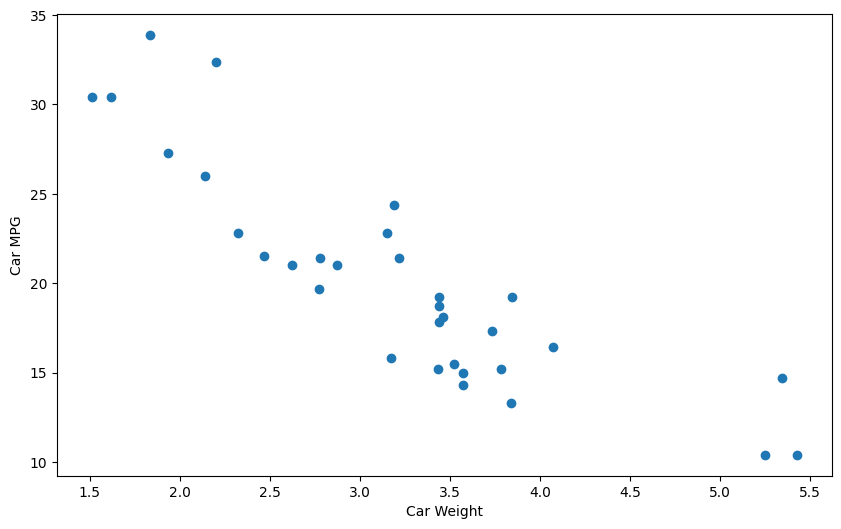

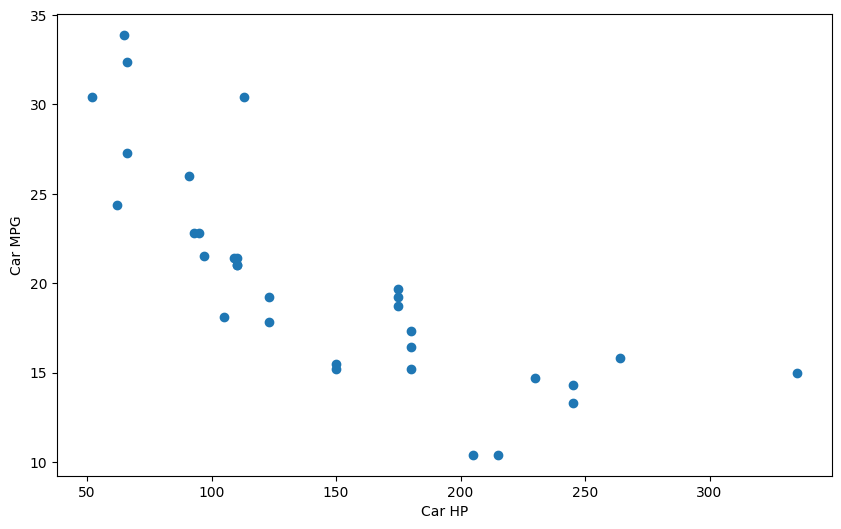

In [28]:
y_mpg = dfcars.mpg
x_wt = dfcars.wt
x_hp = dfcars.hp

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_wt, y_mpg)
ax_wt.set_xlabel(r'Car Weight')
ax_wt.set_ylabel(r'Car MPG')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_hp, y_mpg)
ax_hp.set_xlabel(r'Car HP')
ax_hp.set_ylabel(r'Car MPG')

* Use sklearn to fit the training data using simple linear regression.
* Use the model to make mpg predictions on the test set.
* Plot the data and the prediction.
* Print out the mean squared error for the training set and the test set and compare.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dfcars = pd.read_csv("../data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [31]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [32]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)

r2 = regression.score(X_test, y_test)
print(r2)

0.6879761857596275


In [33]:
print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

0.7701379909791617
12.475985659918825
7.773697766387515
Coefficients: 
 -5.33694140055708 36.93731031351841


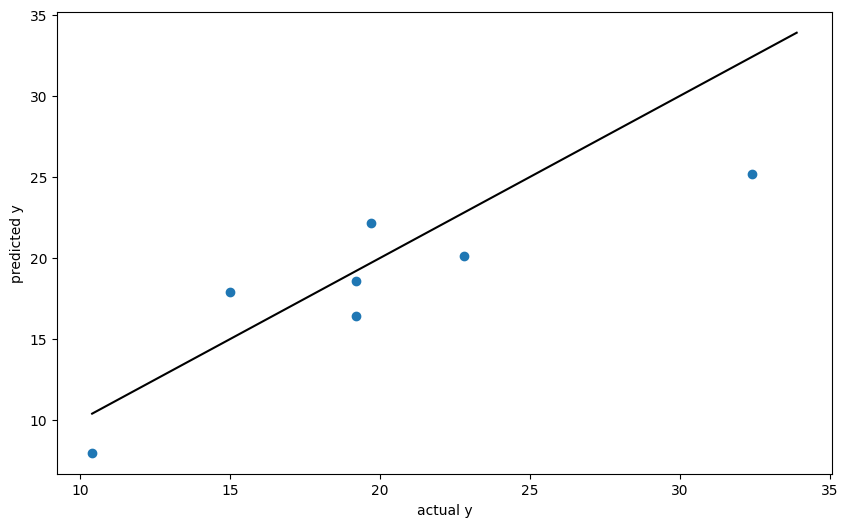

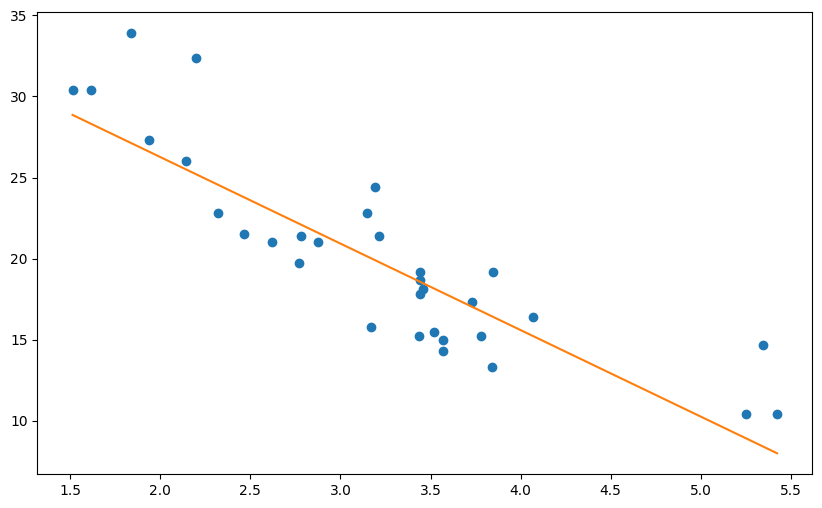

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))

# k-Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)

In [36]:
knnreg.fit(X_train, y_train)
r2 = knnreg.score(X_test, y_test)
r2

0.6992188728167332

In [37]:
knnreg.score(X_train, y_train)

0.8718092469742431

Lets vary the number of neighbors and see what we get.

In [38]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    regdict[k] = knnreg # Store the regressors in a dictionary


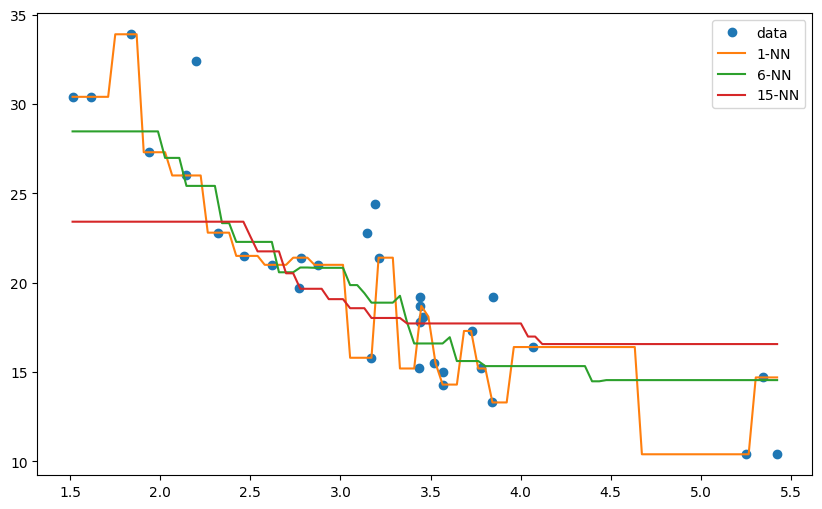

In [39]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

Notice how the 1-NN goes through every point on the training set but utterly fails elsewhere. Lets look at the scores on the training set.

Text(0, 0.5, '$R^{2}$')

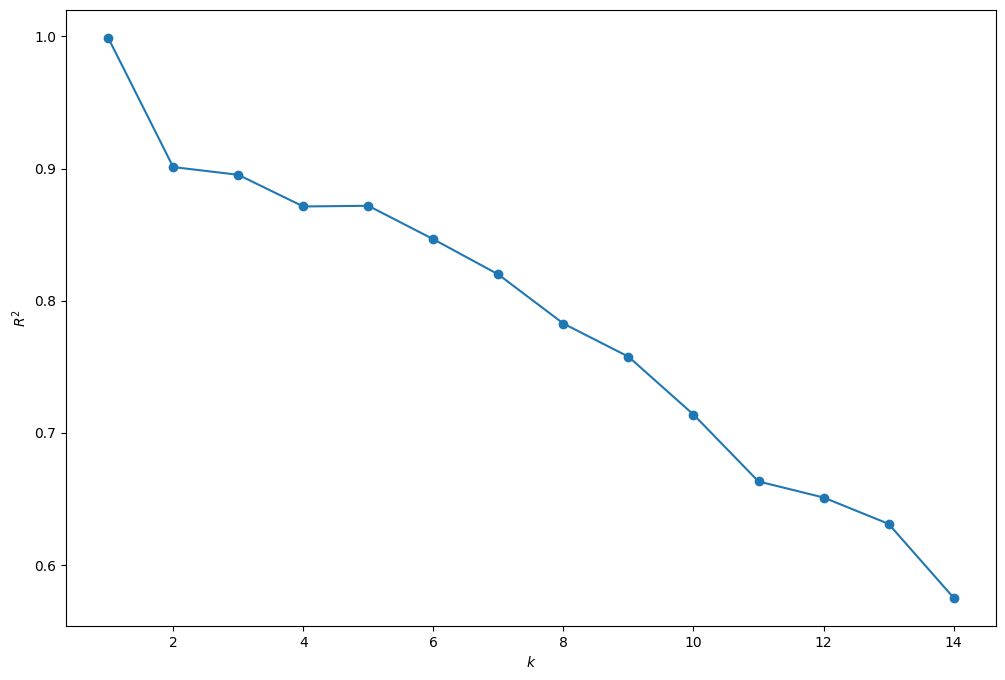

In [40]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_train = knnreg.score(X_train, y_train) # Calculate R^2 score
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

Make the same plot as above on the test set.

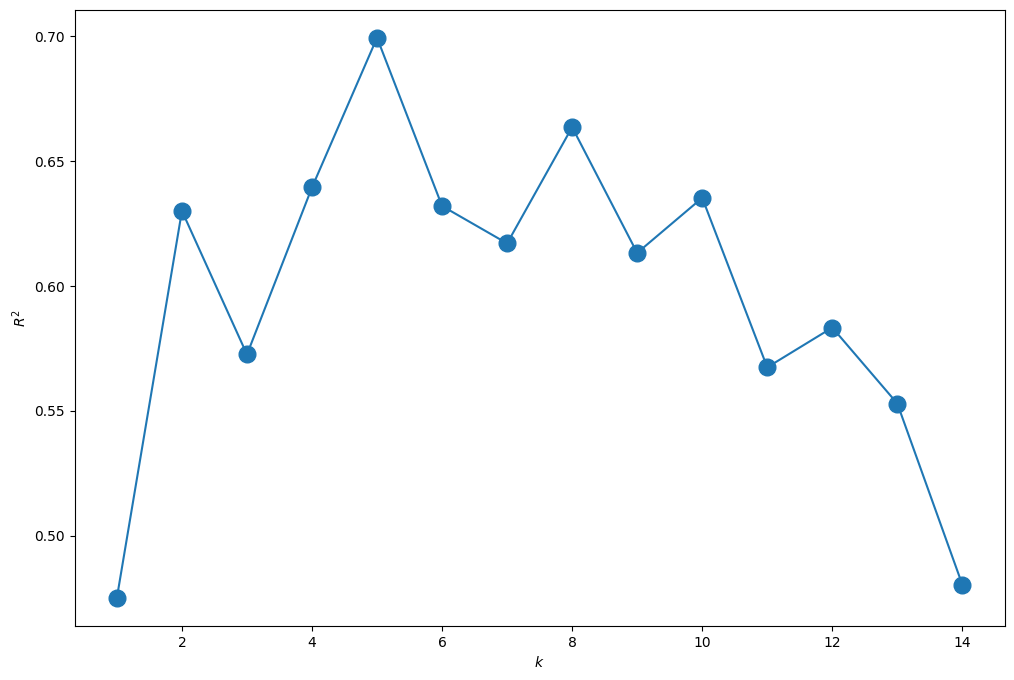

In [42]:
ks = range(1, 15) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_test = knnreg.score(X_test, y_test) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_test,'o-', ms=12)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$');